In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
d = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
d.iloc[281]

v1                                                          ham
v2                                          \Wen u miss someone
Unnamed: 2     the person is definitely special for u..... B...
Unnamed: 3                                     why to miss them
Unnamed: 4                        just Keep-in-touch\" gdeve.."
Name: 281, dtype: object

In [4]:
# data cleaning
# EDA
# Text preprocessign
# Model building
# Evaluation
# Improvement

## Data Cleaning

In [5]:
# dropping last three columns
d.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [6]:
d.sample(5)

,v1,v2
1767,ham,"K, want us to come by now?"
3669,ham,Ok thanx... Take care then...
1902,ham,My sister got placed in birla soft da:-)
4075,spam,87077: Kick off a new season with 2wks FREE go...
1561,ham,Dnt worry...use ice pieces in a cloth pack.als...


In [7]:
# renaming the columns
d.rename(columns = {'v1' : 'target' , 'v2' : 'text'} , inplace = True)

In [8]:
d

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# changing the values in spam and not spam as 0 and 1 
encoder = LabelEncoder()

In [10]:
d['target'] = encoder.fit_transform(d['target'])

In [11]:
d

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
# missing values
d.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# duplicate values
d.duplicated().sum()

np.int64(403)

In [14]:
d = d.drop_duplicates(keep = "first")

In [15]:
d.shape

(5169, 2)

## EDA (Exploratory Data Analysis)

In [16]:
# counting how much spam and not spam
d['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

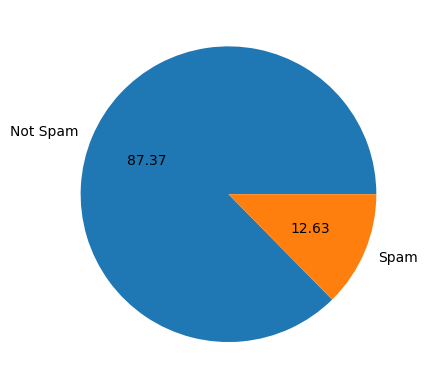

In [17]:
plt.pie(d['target'].value_counts() , labels = ['Not Spam' , 'Spam'] , autopct = '%0.2f')
plt.show()

In [18]:
# data is imbalenced
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
d['num_charaters'] = d['text'].apply(len)

C:\Users\moksh\AppData\Local\Temp\ipykernel_26188\3722953771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['num_charaters'] = d['text'].apply(len)


In [20]:
d

,target,text,num_charaters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
d['num_words'] = d['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\moksh\AppData\Local\Temp\ipykernel_26188\1431056384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['num_words'] = d['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [22]:
d

,target,text,num_charaters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [23]:
d['num_sentenes'] = d['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\moksh\AppData\Local\Temp\ipykernel_26188\4290955302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['num_sentenes'] = d['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
d

,target,text,num_charaters,num_words,num_sentenes
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
d[['num_charaters' , 'num_words' , 'num_sentenes']].describe()

,num_charaters,num_words,num_sentenes
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# not spam sms description
d[d['target'] == 0][['num_charaters' , 'num_words' , 'num_sentenes']].describe()

,num_charaters,num_words,num_sentenes
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# spam sms description
d[d['target'] == 1][['num_charaters' , 'num_words' , 'num_sentenes']].describe()

,num_charaters,num_words,num_sentenes
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_charaters', ylabel='Count'>

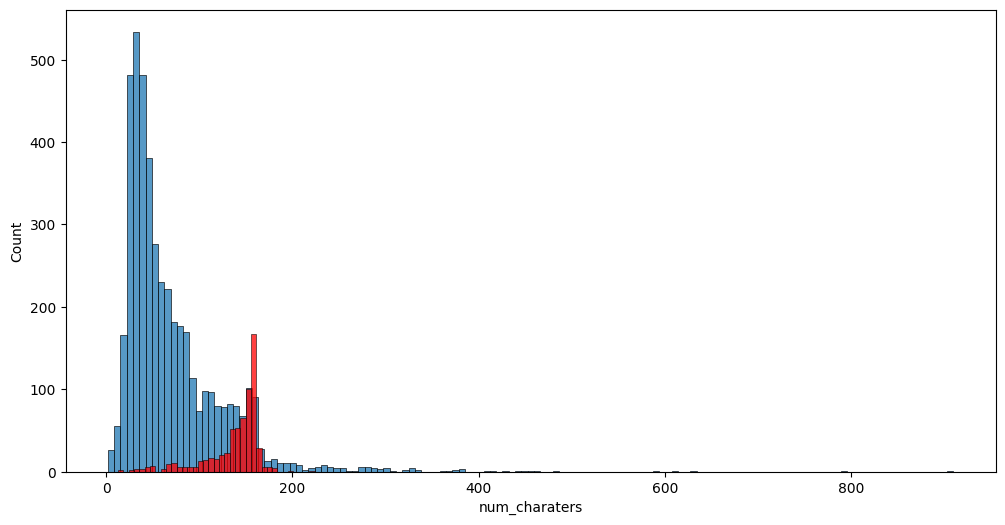

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(d[d['target'] == 0]['num_charaters'])
sns.histplot(d[d['target'] == 1]['num_charaters'] , color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

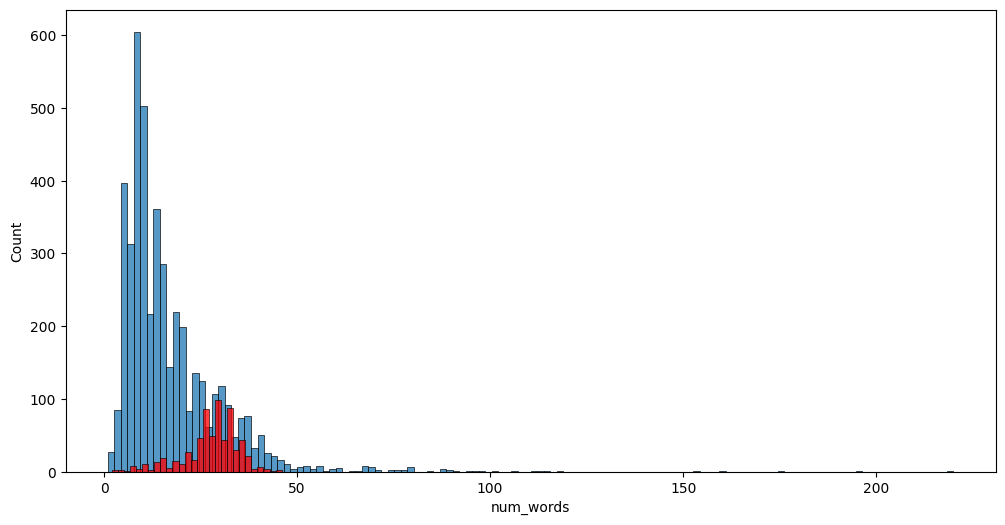

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(d[d['target'] == 0]['num_words'])
sns.histplot(d[d['target'] == 1]['num_words'] , color = 'red')

<Axes: xlabel='num_sentenes', ylabel='Count'>

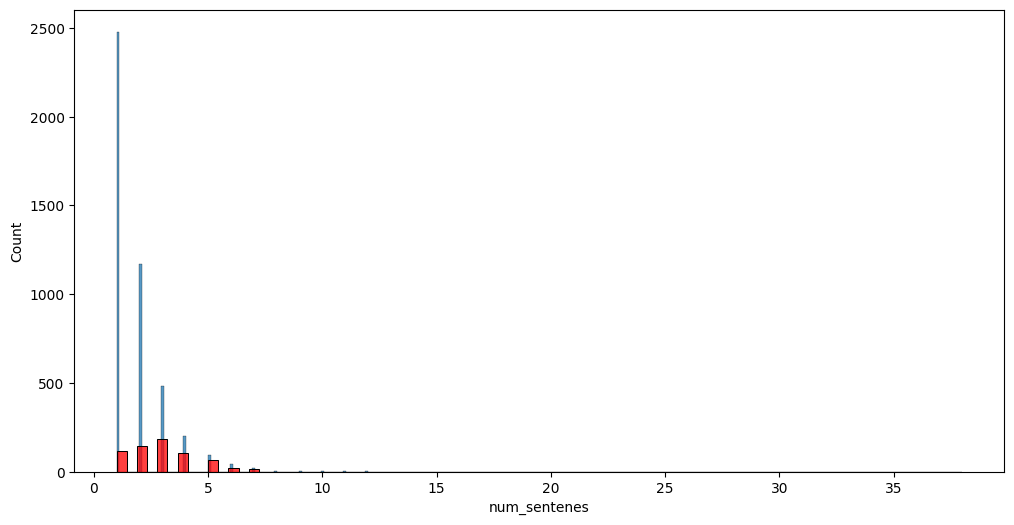

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(d[d['target'] == 0]['num_sentenes'])
sns.histplot(d[d['target'] == 1]['num_sentenes'] , color = 'red')

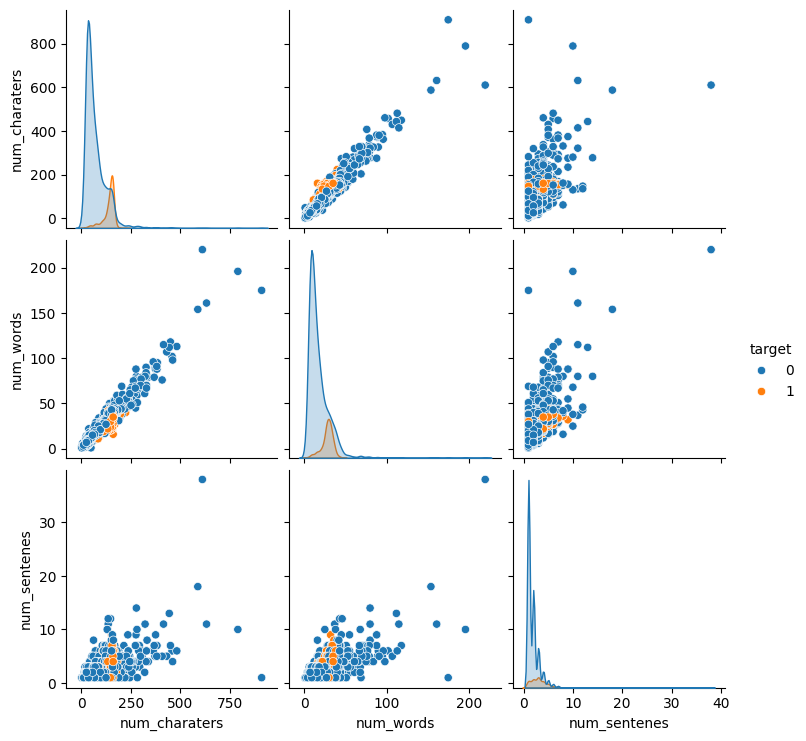

In [31]:
sns.pairplot(d , hue = 'target')

In [32]:
d[['target' , 'num_charaters' , 'num_words' , 'num_sentenes']].corr()

,target,num_charaters,num_words,num_sentenes
target,1.000000,0.384717,0.262912,0.263939
num_charaters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentenes,0.263939,0.624139,0.679971,1.000000


<Axes: >

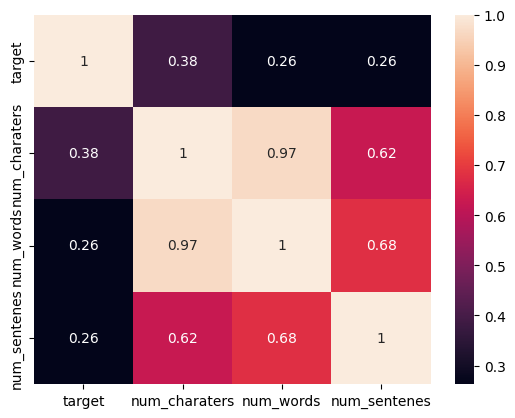

In [33]:
sns.heatmap(d[['target' , 'num_charaters' , 'num_words' , 'num_sentenes']].corr() , annot=True )

## Data Preprocessing

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
ps = PorterStemmer()

In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
transform_text("hii How RERE you 20% ? Moksh danced")

'hii rere 20 moksh danc'

In [38]:
d['transformed_text'] = d['text'].apply(transform_text)

C:\Users\moksh\AppData\Local\Temp\ipykernel_26188\297233434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['transformed_text'] = d['text'].apply(transform_text)


In [39]:
d.head()

,target,text,num_charaters,num_words,num_sentenes,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [41]:
spam = wc.generate(d[d['target'] == 1]['transformed_text'].str.cat(sep = " "))

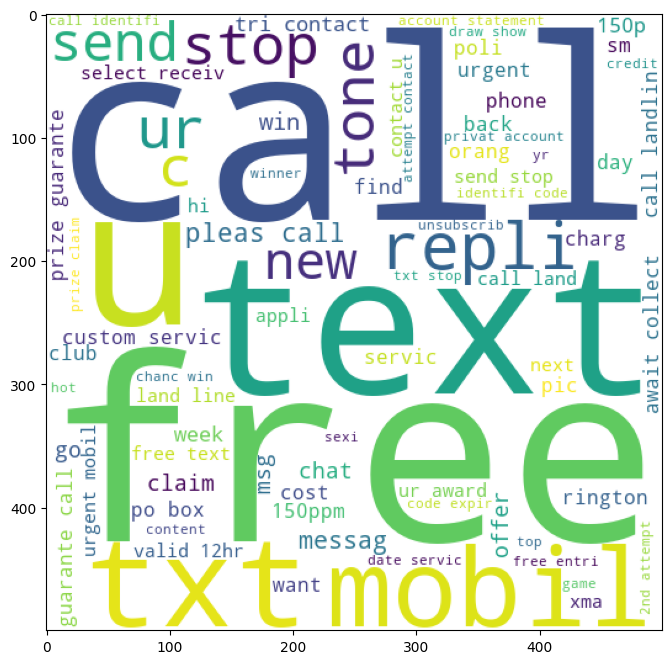

In [42]:
plt.figure(figsize=(14,8))
plt.imshow(spam)

In [43]:
ham = wc.generate(d[d['target'] == 0]['transformed_text'].str.cat(sep = " "))

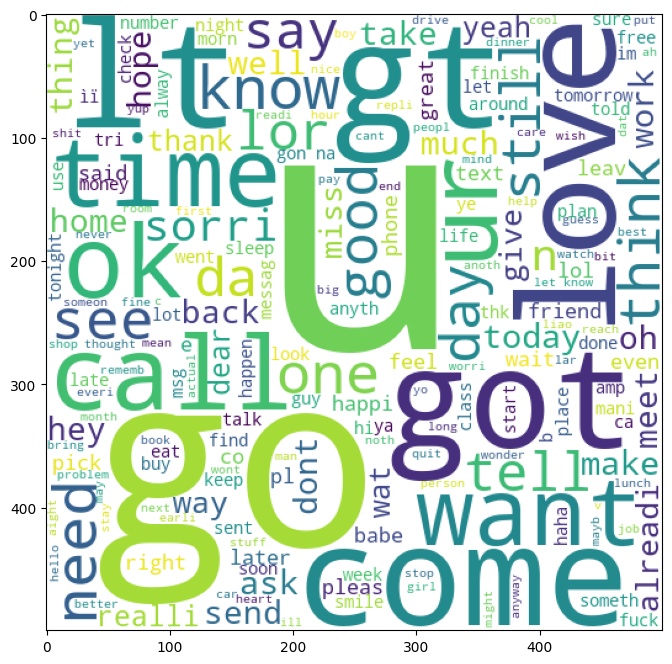

In [44]:
plt.figure(figsize=(14,8))
plt.imshow(ham)

In [45]:
spam_corpus = []
for message in d[d['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

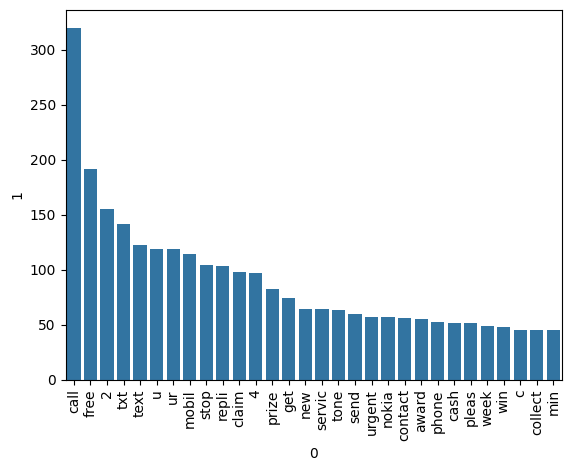

In [47]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [48]:
ham_corpus = []
for message in d[d['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35404

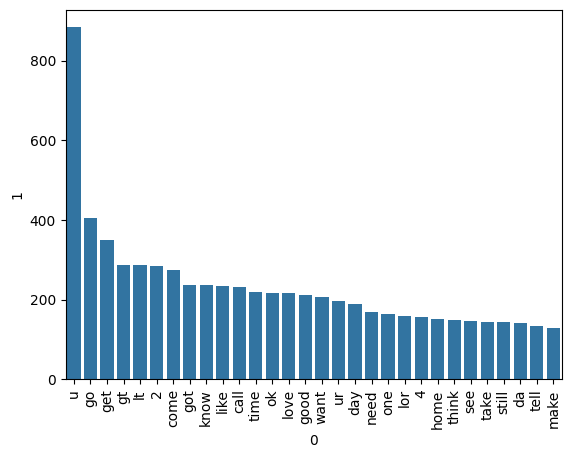

In [50]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

## Model Building

In [51]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [52]:
# X = cv.fit_transform(d['transformed_text']).toarray()
X = tfidf.fit_transform(d['transformed_text']).toarray()

In [53]:
X.shape

(5169, 3000)

In [54]:
y = d['target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [59]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [60]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [61]:
import pickle

In [62]:
pickle.dump(tfidf , open("vectorizer.pkl" , 'wb'))
pickle.dump(mnb,open('model.pkl' , 'wb'))